In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the datasets
customers = pd.read_csv('/content/drive/MyDrive/datasets/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/datasets/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/datasets/Transactions.csv')

In [15]:
# Mergeing the datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


In [20]:
print(merged_data.describe)

<bound method NDFrame.describe of     TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0          T00001      C0199      P067  2024-08-25 12:38:23         1   
1          T00112      C0146      P067  2024-05-27 22:23:54         1   
2          T00166      C0127      P067  2024-04-25 07:38:55         1   
3          T00272      C0087      P067  2024-03-26 22:55:37         2   
4          T00363      C0070      P067  2024-03-21 15:10:10         3   
..            ...        ...       ...                  ...       ...   
995        T00496      C0118      P037  2024-10-24 08:30:27         1   
996        T00759      C0059      P037  2024-06-04 02:15:24         3   
997        T00922      C0018      P037  2024-04-05 13:05:32         4   
998        T00959      C0115      P037  2024-09-29 10:16:02         2   
999        T00992      C0024      P037  2024-04-21 10:52:24         1   

     TotalValue  Price_x          CustomerName         Region  SignupDate  \
0        300

In [26]:
#Total Spending per Customer
customer_total_spending = merged_data.groupby('CustomerID')['TotalValue'].sum().rename("Total Transaction")
customer_total_spending.head(10)

,Total Transaction
CustomerID,
C0001,3354.52
C0002,1862.74
C0003,2725.38
C0004,5354.88
C0005,2034.24
C0006,4227.57
C0007,2579.82
C0008,4271.61
C0009,896.50


In [25]:
#Transaction Count per Customer
customer_transaction_count = merged_data.groupby('CustomerID')['TransactionID'].count().rename("TransactionCount")
customer_transaction_count.head(10)

,TransactionCount
CustomerID,
C0001,5
C0002,4
C0003,4
C0004,8
C0005,3
C0006,4
C0007,3
C0008,10
C0009,3


In [24]:
#Product Category Preferences
product_categories = pd.get_dummies(merged_data['Category'])
product_categories.head(10)

,Books,Clothing,Electronics,Home Decor
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
5,False,False,True,False
6,False,False,True,False
7,False,False,True,False
8,False,False,True,False
9,False,False,True,False


In [23]:

customer_product_preferences = pd.concat([merged_data['CustomerID'], product_categories], axis=1).groupby('CustomerID').sum()
customer_product_preferences.head(10)

,Books,Clothing,Electronics,Home Decor
CustomerID,,,,
C0001,1,0,3,1
C0002,0,2,0,2
C0003,0,1,1,2
C0004,3,0,2,3
C0005,0,0,2,1
C0006,2,1,0,1
C0007,0,0,2,1
C0008,1,2,3,4
C0009,0,2,1,0


In [27]:
#Combineing features into a single dataframe
customer_features = pd.concat([customer_total_spending, customer_transaction_count, customer_product_preferences], axis=1)
customer_features.columns = ['TotalSpending', 'TransactionCount'] + list(product_categories.columns)
customer_features = customer_features.fillna(0)
customer_features.head(10)

,TotalSpending,TransactionCount,Books,Clothing,Electronics,Home Decor
CustomerID,,,,,,
C0001,3354.52,5,1,0,3,1
C0002,1862.74,4,0,2,0,2
C0003,2725.38,4,0,1,1,2
C0004,5354.88,8,3,0,2,3
C0005,2034.24,3,0,0,2,1
C0006,4227.57,4,2,1,0,1
C0007,2579.82,3,0,0,2,1
C0008,4271.61,10,1,2,3,4
C0009,896.50,3,0,2,1,0


**StandardScaler** is used to scale the features, ensuring that each feature contributes equally to the similarity calculation. This prevents features with larger values from dominating the similarity measure.

In [30]:
# Scale the features using StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features)
customer_features_scaled = pd.DataFrame(scaled_features, index=customer_features.index, columns=customer_features.columns)
customer_features_scaled.head(10)


,TotalSpending,TransactionCount,Books,Clothing,Electronics,Home Decor
CustomerID,,,,,,
C0001,-0.061701,-0.011458,-0.321113,-1.041606,1.550878,-0.221044
C0002,-0.877744,-0.467494,-1.221132,0.776636,-1.148463,0.676665
C0003,-0.405857,-0.467494,-1.221132,-0.132485,-0.248683,0.676665
C0004,1.032547,1.356650,1.478927,-1.041606,0.651097,1.574374
C0005,-0.783929,-0.923530,-1.221132,-1.041606,0.651097,-0.221044
C0006,0.415879,-0.467494,0.578907,-0.132485,-1.148463,-0.221044
C0007,-0.485482,-0.923530,-1.221132,-1.041606,0.651097,-0.221044
C0008,0.439970,2.268722,-0.321113,0.776636,1.550878,2.472083
C0009,-1.406302,-0.923530,-1.221132,0.776636,-0.248683,-1.118753


**Cosine similarity** is used to measure the similarity between customers based on their scaled features.

In [31]:
# Similarity Calculation
# Calculating cosine similarity between customers
similarity_matrix = cosine_similarity(customer_features_scaled)
similarity_df = pd.DataFrame(similarity_matrix, index=customer_features.index, columns=customer_features.index)
similarity_df.head(10)

CustomerID,C0001,C0002,C0003,C0004,C0005,C0006,C0007,C0008,C0009,C0010,...,C0191,C0192,C0193,C0194,C0195,C0196,C0197,C0198,C0199,C0200
CustomerID,,,,,,,,,,,,,,,,,,,,,
C0001,1.000000,-0.543526,0.008521,0.207247,0.639399,-0.648818,0.663290,0.150929,-0.096003,-0.634061,...,0.440428,0.503934,-0.201515,0.285341,-0.277115,-0.542802,0.633724,0.100152,0.601595,-0.495816
C0002,-0.543526,1.000000,0.790546,-0.577685,0.193104,0.066512,0.143335,-0.066547,0.597320,0.584327,...,-0.787825,-0.092157,-0.397339,-0.537187,0.605610,0.421795,0.201838,0.488894,0.288609,0.204288
C0003,0.008521,0.790546,1.000000,-0.388437,0.626479,-0.223128,0.616188,0.056888,0.437144,0.076006,...,-0.712432,0.007555,-0.606598,-0.402127,0.632639,0.398136,0.627097,0.504787,0.764798,-0.044808
C0004,0.207247,-0.577685,-0.388437,1.000000,-0.422756,-0.069967,-0.391415,0.621730,-0.962310,-0.818710,...,0.245137,-0.637595,0.128674,0.901738,0.093611,0.040127,-0.427646,-0.887304,-0.112545,-0.312387
C0005,0.639399,0.193104,0.626479,-0.422756,1.000000,-0.376271,0.990657,-0.295143,0.512990,-0.124471,...,0.034055,0.651503,-0.257070,-0.422295,-0.102213,-0.164517,0.999687,0.743788,0.885586,-0.440134
C0006,-0.648818,0.066512,-0.223128,-0.069967,-0.376271,1.000000,-0.351134,-0.630002,-0.118470,0.260830,...,0.120547,-0.327740,0.709872,-0.415730,-0.294621,0.642916,-0.380118,-0.023576,-0.523987,0.206812
C0007,0.663290,0.143335,0.616188,-0.391415,0.990657,-0.351134,1.000000,-0.291444,0.453350,-0.184504,...,0.018756,0.611217,-0.280449,-0.418916,-0.086222,-0.099233,0.986938,0.698175,0.867907,-0.369502
C0008,0.150929,-0.066547,0.056888,0.621730,-0.295143,-0.630002,-0.291444,1.000000,-0.510932,-0.469067,...,-0.371993,-0.512542,-0.616702,0.821001,0.666506,-0.125828,-0.295224,-0.670928,0.106547,0.013464
C0009,-0.096003,0.597320,0.437144,-0.962310,0.512990,-0.118470,0.453350,-0.510932,1.000000,0.778819,...,-0.206268,0.716425,-0.179993,-0.793984,-0.081768,-0.219120,0.522885,0.920169,0.257507,0.112252


The get_recommendations function takes a customer ID and returns the top n most similar customers.A loop iterates through a subset of customers and generates lookalike recommendations.

In [32]:
#Recommendation Function
def get_recommendations(customer_id,n=3):
    if customer_id not in similarity_df.index:
        print(f"Customer ID {customer_id} not found.")
        return []
    customer_similarities = similarity_df.loc[customer_id].sort_values(ascending=False)
    customer_similarities = customer_similarities.drop(customer_id)
    top_customers = customer_similarities.head(n)
    recommendations = pd.DataFrame({'CustomerID': top_customers.index, 'SimilarityScore': top_customers.values})

    return recommendations

In [42]:
#Lookalike Recommendations
lookalike_map = {}
for customer_id in customers['CustomerID'][:20]:
    recommendations = get_recommendations(customer_id, n=3)
    lookalike_map[customer_id] = [[row['CustomerID'], row['SimilarityScore']] for _, row in recommendations.iterrows()]
    print(f"Lookalike recommendations for Customer ID {customer_id}:")
    print(recommendations)

Lookalike recommendations for Customer ID C0001:
  CustomerID  SimilarityScore
0      C0069         0.947426
1      C0127         0.873969
2      C0190         0.846072
Lookalike recommendations for Customer ID C0002:
  CustomerID  SimilarityScore
0      C0133         0.968144
1      C0062         0.899791
2      C0134         0.896844
Lookalike recommendations for Customer ID C0003:
  CustomerID  SimilarityScore
0      C0166         0.994460
1      C0031         0.974643
2      C0158         0.937610
Lookalike recommendations for Customer ID C0004:
  CustomerID  SimilarityScore
0      C0090         0.917846
1      C0122         0.911879
2      C0017         0.909414
Lookalike recommendations for Customer ID C0005:
  CustomerID  SimilarityScore
0      C0197         0.999687
1      C0007         0.990657
2      C0140         0.899191
Lookalike recommendations for Customer ID C0006:
  CustomerID  SimilarityScore
0      C0135         0.913166
1      C0187         0.774692
2      C0185    

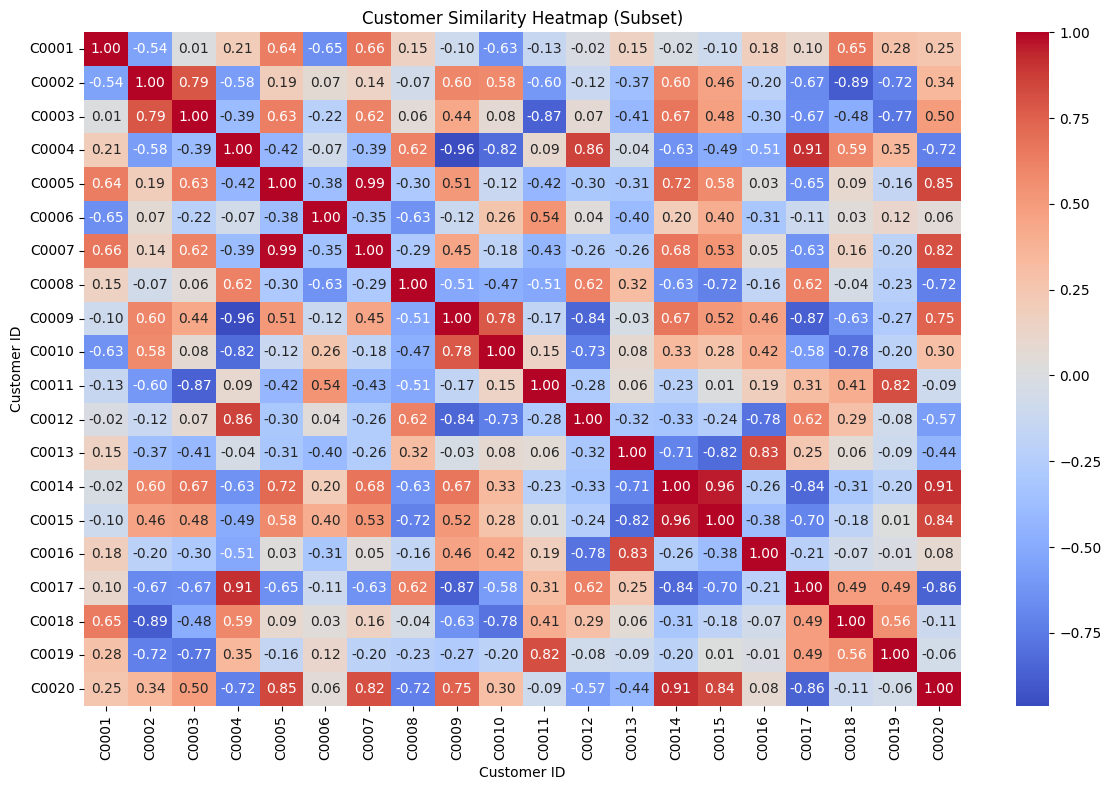

In [43]:
subset_similarity_df = similarity_df.iloc[:20, :20]
plt.figure(figsize=(12, 8))
sns.heatmap(subset_similarity_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Customer Similarity Heatmap (Subset)")
plt.xlabel("Customer ID")
plt.ylabel("Customer ID")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

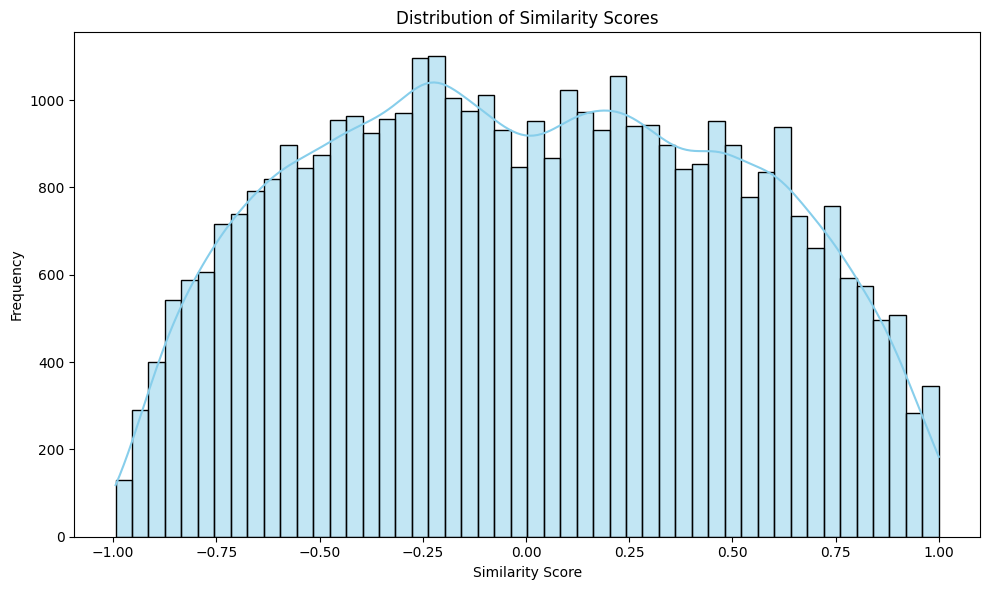

In [44]:
all_similarities = similarity_matrix.flatten()
plt.figure(figsize=(10, 6))
sns.histplot(all_similarities, bins=50, kde=True, color="skyblue")
plt.title("Distribution of Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [45]:
#Saving lookalike recommendations to CSV
import csv
with open('Lookalike.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['CustomerID', 'Lookalikes'])
    for customer_id, lookalikes in lookalike_map.items():
        writer.writerow([customer_id, lookalikes])